In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pipeline import *
from camera_calibration import *
from report_helper import *

In [3]:
image_list = os.listdir("./test_frames/")
if '.DS_Store' in image_list:
    image_list.remove('.DS_Store')    

# Single Image Test

In [39]:
i=0

p = Pipeline()

image_path = image_list[0]
image = p.find_lanes("./test_frames/"+image_path);

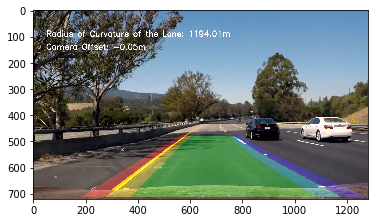

In [40]:
rshow(image)

# Video Test

In [29]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from pipeline import Pipeline
from functools import partial

def gen():
    for i in range(10,10000):
        yield i
        
g = gen()

def process_image(image, pipeline=None):
    result = pipeline.find_lanes(image, show=False)
    return result

def extract_frames(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite('./test_frames/frame_{}.jpg'.format(next(g)),result)
    return result

pipeline = Pipeline()
detect_lanes = partial(process_image, pipeline=pipeline)

clip1 = VideoFileClip("project_video.mp4")

output_dir = "./output"
file_name = "project_video.mp4"

output_path = os.path.join(output_dir, file_name)
video_output_path = os.path.realpath(output_path)

output_clip = clip1.fl_image(detect_lanes)
# output_clip = clip1.fl_image(detect_lanes).subclip(0,3)

%time output_clip.write_videofile(video_output_path, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(output_path))

[MoviePy] >>>> Building video /Users/amogh/workspace/jazz/code/courses/sdc_project4/output/project_video.mp4
[MoviePy] Writing video /Users/amogh/workspace/jazz/code/courses/sdc_project4/output/project_video.mp4


100%|█████████▉| 1260/1261 [10:43<00:00,  1.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /Users/amogh/workspace/jazz/code/courses/sdc_project4/output/project_video.mp4 

CPU times: user 13min 5s, sys: 1min 9s, total: 14min 15s
Wall time: 10min 44s
